In [57]:
# AI vs. RUCAPTCHA. 

# Very often you have to collect datasets, bypass captchas. An ordinary captcha as an image can be easily recognized using AI algorithms. But there are  # many services on the web that use people's responses to solve captchas. For example, RUCAPTCHA (https://rucaptcha.com?from=10580167). Ru captcha #answers the question " what color is milk?# "in 3 seconds. How can I recognize a similar text captcha using AI? Who is foo's brother? RUCAPTCHA did not #respond to this question)) Artificial intelligence will respond if trained. Rate the work of RUCAPTCHA and its responses. 

In [121]:
#Importing libraries
import pandas as pd
import numpy as np

from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [122]:
LINK = 'https://rucaptcha.com/demo/normal'

In [123]:
driver = webdriver.Chrome("/usr/local/bin/Chromedriver")
driver.get(LINK)

In [124]:
# get the image source
img = driver.find_element_by_xpath('//img[@id="captcha"]')
print(img)

<selenium.webdriver.remote.webelement.WebElement (session="9e56587c7224fb5d7cf5d15ffd75d586", element="d9660269-9112-47ec-9f50-41ddcaa28a97")>


In [125]:
src = img.get_attribute('src')
print(src)

https://2captcha.com/template/demo/images/normal.jpg


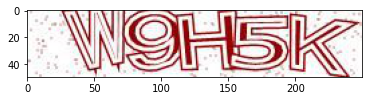

In [126]:
# download the image
import requests

out = requests.get(src).content
file = open("/usr/local/bin/captcha.png", "wb")  # write captcha on disk
file.write(out)
file.close()

image = np.asarray(Image.open("/usr/local/bin/captcha.png").convert('RGB')) # converting png to an array
plt.imshow(image)

In [127]:
import requests
import asyncio
import base64
from python_rucaptcha import ImageCaptcha, CallbackClient, RuCaptchaControl

RUCAPTCHA_KEY = ""
user_answer_const = ImageCaptcha.ImageCaptcha(
    rucaptcha_key=RUCAPTCHA_KEY, img_path="test_files", img_clearing=False, save_format="const"
).captcha_handler(captcha_link=str(src))
print(user_answer_const['captchaSolve'])

W9H5K


In [131]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""
# example
text_question = "Какого цвета молоко?"

user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # predict
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])


Белого
65161211227


In [137]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""
# example
text_question = "yes or no?"

user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # predict
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])

no
65161274447


In [139]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""
# example
text_question = "Jhon Len..n?"

user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # predict
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])

no
65161287713


In [146]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""
# example
text_question = "Bad Boys ..?"

user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # predict
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])

плохие парни
65161365646


In [163]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""
# example
text_question = "Minimum numbers 28, six, 47, 78?"

user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # predict
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])

six
65161690368


In [160]:
import requests
from python_rucaptcha import TextCaptcha, RuCaptchaControl, CallbackClient

# input rucaptcha key
RUCAPTCHA_KEY = ""

LINK = 'https://rucaptcha.com/demo/text'
driver = webdriver.Chrome("/usr/local/bin/Chromedriver")
driver.get(LINK)
# get the text source
texto = driver.find_element_by_xpath('//div[@id="captcha-text"]')
print(texto)
print(str(texto.get_attribute('innerHTML')))

text_question = str(texto.get_attribute('innerHTML'))
user_answer = TextCaptcha.TextCaptcha(rucaptcha_key=RUCAPTCHA_KEY).captcha_handler(
    captcha_text=text_question
)

if user_answer["error"] == 0:
    # решение капчи
    print(user_answer["captchaSolve"])
    print(user_answer["taskId"])
elif user_answer["error"] == 1:
    # error
    print(user_answer["errorBody"])


<selenium.webdriver.remote.webelement.WebElement (session="ce26d7d948a26a5230e798ae4e630dfd", element="947fab6a-b74e-457f-8132-88612770b4b3")>
Если завтра суббота, то какой сегодня день?
пятница
65161618379


In [119]:
import requests
import asyncio
import base64
from python_rucaptcha import ImageCaptcha, CallbackClient, RuCaptchaControl

RUCAPTCHA_KEY = ""
user_answer_const = ImageCaptcha.ImageCaptcha(
    rucaptcha_key=RUCAPTCHA_KEY, img_path="test_files", img_clearing=False, save_format="const"
).captcha_handler(captcha_link='https://ext.captcha.yandex.net/image?key=00A0PVv5KhB0nay0ePsQExuinfA1homx')
print(user_answer_const['captchaSolve'])

бусина
